In [3]:
import tensorflow as tf

a=tf.Variable(1, name='a')
b=tf.Variable(2, name='b')
#f is the graph or connection betw a nd b
f=a + b

init= tf.global_variables_initializer()
with tf.Session() as s:
    init.run()
    print(f.eval())

3


In [6]:
from tensorflow.examples.tutorials.mnist import input_data

sess=tf.InteractiveSession()
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

C:\Users\codehax\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [10]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002BAAE44AEB8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002BAAE4922E8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002BAAE4926A0>)

###### 550000 training data set inside mnist , 28*28=784
#5000 validation data

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


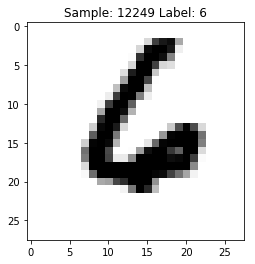

In [17]:
import matplotlib.pyplot as plt

def display_samp(num):
    #one hat of sample
    print(mnist.train.labels[num])
    #label converted back to a number
    label=mnist.train.labels[num].argmax(axis=0)
    #reshepe 768 to 28,28
    image=mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' %(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_samp(12249)

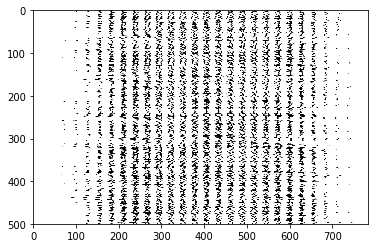

In [25]:
import numpy as np

images=mnist.train.images[0].reshape([1,784])
for i in range(1,500):
    images=np.concatenate((images, mnist.train.images[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [27]:
#setting ann
input_images=tf.placeholder(tf.float32, shape=[None, 784])
target_labels=tf.placeholder(tf.float32, shape=[None, 10])

In [31]:
#setting multilayer perceptron-dnn
hidden_nodes=512
#normalized nodes thats take 784 input and and another layer of 512
input_weight=tf.Variable(tf.truncated_normal([784, hidden_nodes]))
#biased layer betw input and hidden layer
input_biases=tf.Variable(tf.zeros([hidden_nodes]))

hidden_weight=tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_biases=tf.Variable(tf.zeros([10]))

In [32]:
input_layer=tf.matmul(input_images,input_weight)
hidden_layer=tf.nn.relu(input_layer + input_biases)
digit_weight=tf.matmul(hidden_layer, hidden_weight) + hidden_biases

In [36]:
loss_fn=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=digit_weight, labels=target_labels))

In [37]:
optimizer=tf.train.GradientDescentOptimizer(0.5).minimize(loss_fn)

In [38]:
correct_pred=tf.equal(tf.argmax(digit_weight,1), tf.argmax(target_labels,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [42]:
tf.global_variables_initializer().run()
for x in range(2000):
    batch=mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images:batch[0], target_labels: batch[1]})
    if((x+1) % 100 == 0):
        print('Training epoch: ' + str(x+1))
        print('Accuracy: ' + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels:mnist.test.labels})))

Training epoch: 100
Accuracy: 0.8576
Training epoch: 200
Accuracy: 0.8815
Training epoch: 300
Accuracy: 0.8904
Training epoch: 400
Accuracy: 0.8993
Training epoch: 500
Accuracy: 0.9025
Training epoch: 600
Accuracy: 0.9067
Training epoch: 700
Accuracy: 0.9102
Training epoch: 800
Accuracy: 0.9124
Training epoch: 900
Accuracy: 0.9144
Training epoch: 1000
Accuracy: 0.9181
Training epoch: 1100
Accuracy: 0.9195
Training epoch: 1200
Accuracy: 0.9218
Training epoch: 1300
Accuracy: 0.9251
Training epoch: 1400
Accuracy: 0.9274
Training epoch: 1500
Accuracy: 0.9244
Training epoch: 1600
Accuracy: 0.9245
Training epoch: 1700
Accuracy: 0.9299
Training epoch: 1800
Accuracy: 0.9267
Training epoch: 1900
Accuracy: 0.931
Training epoch: 2000
Accuracy: 0.9327


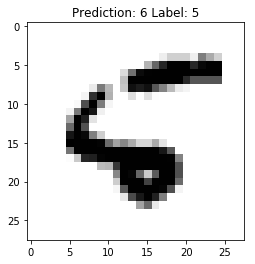

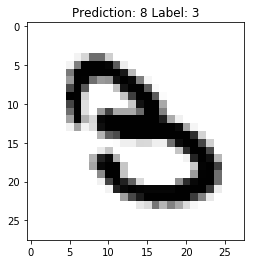

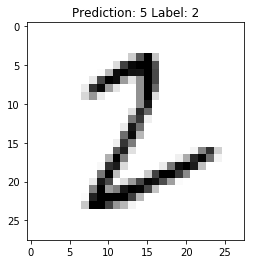

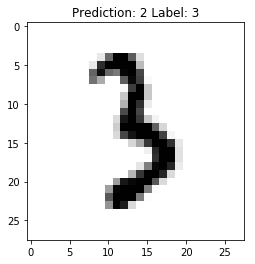

In [51]:
#misclassified
for x in range(50):
    x_train=mnist.test.images[x,:].reshape(1,784)
    y_train=mnist.test.labels[x,:]
    label=y_train.argmax()
    prediction=sess.run(digit_weight, feed_dict={input_images: x_train}).argmax()
    if(prediction != label):
        plt.title('Prediction: %d Label: %d' % (prediction,label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()